In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
df_data = pd.read_csv("Regression.csv")

In [262]:
df_data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [263]:
df_data['A'].isna().sum()

0

In [264]:
std_out = df_data['C'].std()
mean_out = df_data['C'].mean()
out_max = mean_out + 3*std_out
out_min = mean_out - 3*std_out
df_data[df_data['C']<out_min]

,A,B,C
200,10.1,-2.24,-10000.0


In [265]:
## Removing outlier
df_data = df_data.drop(200)

In [266]:
std_x = df_data['A'].std()
mean_x = df_data['A'].mean()
x_min = mean_x-3*std_x
x_max = mean_x + 3*std_x
df_data[df_data['A']>x_max]

,A,B,C
209,20.6,1.74,-248.0


In [267]:
## Removing outlier
df_data = df_data.drop(209)

In [268]:
std_y = df_data['B'].std()
mean_y = df_data['B'].mean()
y_min = mean_y-3*std_y
y_max = mean_y + 3*std_y
df_data[df_data['B']>y_max]

,A,B,C


In [269]:
df_data['B'].min()

-2.89

In [270]:
X= df_data['A']
Y=df_data['B']
OUT=df_data['C']

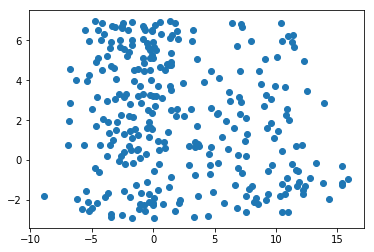

In [271]:
plt.scatter(X,Y)

In [272]:
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

2550.0413210184633

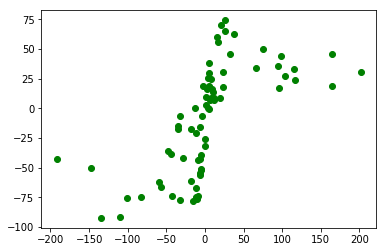

In [273]:
## Applying Linear regression using ML package

X = df_data[['A','B']]
y = df_data['C']

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.25,random_state=42)

linreg = linear_model.LinearRegression()

linreg.fit(train_X,train_Y)
test_pred = linreg.predict(test_X)


plt.scatter(test_Y,test_pred,color='g')


mean_squared_error(test_Y,test_pred)

0.0515365802491406

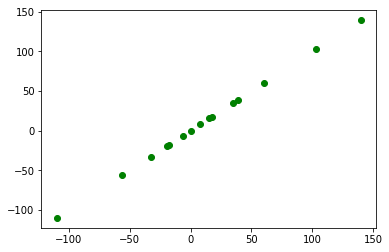

In [274]:
## Applying Polynomial features for Linear regression
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
train_X,test_X,train_Y,test_Y = train_test_split(X_poly,y,test_size=0.05,random_state=48)
linreg.fit(train_X,train_Y)
test_pred = linreg.predict(test_X)
plt.scatter(test_Y,test_pred,color='g')

mean_squared_error(test_Y,test_pred)

In [275]:
## Now implementing Polynomial regression from Scratch

df_data['A2']=df_data['A']*df_data['A']
df_data['A3']=df_data['A']*df_data['A']*df_data['A']

df_data['B2']=df_data['B']*df_data['B']
df_data['B3']=df_data['B']*df_data['B']*df_data['B']

In [277]:
## Implementing Gradient Descent

X = df_data[['A','B','A2','B2']].values
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X],1)
y = df_data['C'].values.reshape(-1,1)

In [281]:
alpha = 0.0001
iters = 100000
# theta is a row vector
theta = np.array([[1.0, 1.0, 1.0,1.0, 1.0]])



In [286]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # Matrix multiplication
    return np.sum(inner) / (2 * len(X))

In [287]:
computeCost(X, y, theta)

6348.29363177196

In [288]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
    return (theta, cost)

In [289]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
print(g, cost)

[[ 25.34396282   0.33513985 -18.01353839  -0.16482809   0.66840245]] 1432.9191481559096


In [294]:
## Prediciton based on input X and theta
y_pred = (X @ theta.T)

(298, 1)

In [293]:
y.shape

(298, 1)

12696.58726354392

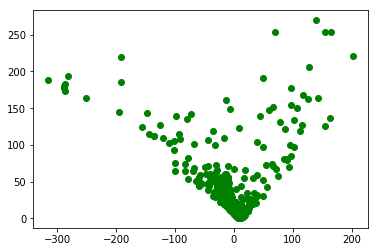

In [295]:
plt.scatter(y,y_pred,color='g')

mean_squared_error(y,y_pred)